In [267]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [268]:
data_08 = pd.read_excel('all_alpha_08.xls')
data_18 = pd.read_csv('all_alpha_18.csv')

In [269]:
data_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [270]:
data_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [271]:
data_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [272]:
data_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [273]:
data_08.shape

(2404, 18)

In [274]:
data_18.shape

(1611, 18)

# Data Analysis - Steps

## Asking questions

(1) Frequent types of Model, Cylynders, Transmission Type, Fuel Type and SmartWay

(2) Which area has more sales ?

(3) Average scores of Air Pollution Score, City MPG, Hwy MPG, Cmb MPG, Greenhouse Gas Score ?

(4) Relation between SmartWay and the scores

(5) Relation between the vehicle model and scores

(6) Relation between the vehicle model and vehicle class

(7) Are more models using alternative sources of fuel? By how much?

(8) How much have vehicle classes improved in fuel economy?

(9) What are the characteristics of SmartWay vehicles?

(10) What features are associated with better fuel economy?

(11) For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

## Assessing Data

In [275]:
data_08.shape

(2404, 18)

In [276]:
sum(data_08.duplicated())

25

In [277]:
data_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [278]:
data_08.isnull().any()

Model                   False
Displ                   False
Cyl                      True
Trans                    True
Drive                    True
Fuel                    False
Sales Area              False
Stnd                    False
Underhood ID            False
Veh Class               False
Air Pollution Score     False
FE Calc Appr             True
City MPG                 True
Hwy MPG                  True
Cmb MPG                  True
Unadj Cmb MPG            True
Greenhouse Gas Score     True
SmartWay                False
dtype: bool

In [279]:
sum(data_08.isnull().any())

9

In [280]:
data_08.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [281]:
sum(data_08.isnull().values.ravel())

1685

In [282]:
data_08.isnull().sum().sum()

1685

In [283]:
sum([True for idx,row in data_08.iterrows() if any(row.isnull())])

199

In [284]:
data_18.shape

(1611, 18)

In [285]:
sum(data_18.duplicated())

0

In [286]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
Model                   1611 non-null object
Displ                   1609 non-null float64
Cyl                     1609 non-null float64
Trans                   1611 non-null object
Drive                   1611 non-null object
Fuel                    1611 non-null object
Cert Region             1611 non-null object
Stnd                    1611 non-null object
Stnd Description        1611 non-null object
Underhood ID            1611 non-null object
Veh Class               1611 non-null object
Air Pollution Score     1611 non-null int64
City MPG                1611 non-null object
Hwy MPG                 1611 non-null object
Cmb MPG                 1611 non-null object
Greenhouse Gas Score    1611 non-null int64
SmartWay                1611 non-null object
Comb CO2                1611 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 226.6+ KB


In [287]:
sum([True for idx,row in data_18.iterrows() if any(row.isnull())])

2

In [288]:
data_08['Fuel'].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [289]:
data_08 = data_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis = 1) 

In [290]:
data_08.shape

(2404, 14)

In [291]:
data_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [292]:
data_18 = data_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis = 1) 

In [293]:
data_18.shape

(1611, 14)

In [294]:
data_08.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

In [295]:
data_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


## Cleaning Column Lables

In [296]:

data_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

data_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [297]:
data_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

data_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


In [298]:
data_08.columns == data_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [299]:
(data_08.columns == data_18.columns).all()

True

## Filter, Drop Nulls, Dedupe

For consistency, only comparing cars certified by California standards.

In [300]:
data_08 = data_08.query('cert_region == "CA"')
data_18 = data_18.query('cert_region == "CA"')

In [301]:
data_08.drop('cert_region', axis = 1, inplace = True)

In [302]:
data_18.drop('cert_region', axis = 1, inplace = True)

In [303]:
data_08.shape

(1084, 13)

In [304]:
data_18.shape

(798, 13)

In [305]:
data_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [306]:
data_08.isnull().sum().sum()

487

In [307]:
data_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [308]:
data_18.isnull().sum().sum()

2

In [309]:
data_08 = data_08.dropna()

In [310]:
data_08.isnull().sum().sum()

0

In [311]:
data_18 = data_18.dropna()

In [312]:
data_18.isnull().sum().sum()

0

In [313]:
sum(data_08.duplicated())

23

In [314]:
sum(data_18.duplicated())

3

In [315]:
data_08.drop_duplicates(inplace = True)

In [316]:
data_18.drop_duplicates(inplace = True)

In [317]:
sum(data_08.duplicated())

0

In [318]:
sum(data_18.duplicated())

0

## Inspecting and Fixing Data Types

In [319]:
data_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no


In [320]:
data_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [321]:
data_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No


In [322]:
data_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Fix cyl datatype
#### 2008: extract int from string
#### 2018: convert float to int

In [323]:
data_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [324]:
data_18['cyl'].value_counts()

4.0     365
6.0     246
8.0     153
3.0      18
12.0      9
5.0       2
16.0      1
Name: cyl, dtype: int64

In [325]:
data_08['cyl'] = data_08['cyl'].str.extract('(\d+)').astype(int)

In [326]:
data_18['cyl']= data_18['cyl'].astype('int32')

In [327]:
data_08['cyl'].unique()

array([ 6,  4, 12,  8, 10, 16,  5,  2], dtype=int64)

In [328]:
data_18['cyl'].unique()

array([ 6,  4,  5, 12, 16,  8,  3], dtype=int64)

In [329]:
data_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
model                   986 non-null object
displ                   986 non-null float64
cyl                     986 non-null int32
trans                   986 non-null object
drive                   986 non-null object
fuel                    986 non-null object
veh_class               986 non-null object
air_pollution_score     986 non-null object
city_mpg                986 non-null object
hwy_mpg                 986 non-null object
cmb_mpg                 986 non-null object
greenhouse_gas_score    986 non-null object
smartway                986 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 104.0+ KB


### Fix air_pollution_score datatype
#### 2008: convert string to float
#### 2018: convert int to float

In [330]:
data_08['air_pollution_score'] = data_08['air_pollution_score'].astype('float64')

ValueError: could not convert string to float: '6/4'

In [331]:
data_08[data_08.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [332]:
hb_08 = data_08[data_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [333]:
hb_18 = data_18[data_18['fuel'].str.contains('/')]
hb_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [334]:
df1 = hb_08.copy()  
df2 = hb_08.copy()

In [335]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [336]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [337]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [338]:
new_rows = df1.append(df2)

new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [339]:
hb_08.index

Int64Index([1550], dtype='int64')

In [340]:
data_08.drop(hb_08.index, inplace=True)

In [341]:
data_08 = data_08.append(new_rows, ignore_index = True)

In [342]:
data_08[data_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [343]:
data_08.shape

(987, 13)

In [344]:
df3 = hb_18.copy()  
df4 = hb_18.copy()

In [345]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in split_columns:
    df3[c] = df3[c].apply(lambda x: x.split("/")[0])
    df4[c] = df4[c].apply(lambda x: x.split("/")[1])

In [346]:
new_rows1 = df3.append(df4)

In [347]:
new_rows1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3,12,17,14,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3,12,17,14,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol,standard SUV,3,11,15,12,3,No


In [348]:
data_18.drop(hb_18.index, inplace=True)

In [349]:
data_18 = data_18.append(new_rows1, ignore_index = True)

In [350]:
data_18.shape

(832, 13)

In [351]:
data_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [352]:
data_08['air_pollution_score'] = data_08['air_pollution_score'].astype('float64')

In [353]:
data_18['air_pollution_score'] = data_18['air_pollution_score'].astype('float64')

In [354]:
data_08.shape

(987, 13)

In [355]:
data_18.shape

(832, 13)

### Fix city_mpg, hwy_mpg, cmb_mpg datatypes
#### 2008 and 2018: convert string to float.

In [356]:
data_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [357]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in mpg_columns:
    data_08[c] = data_08[c].astype('float64')

In [358]:
data_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [359]:
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in mpg_columns:
    data_18[c] = data_18[c].astype('float64')

In [360]:
data_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [361]:
data_08['greenhouse_gas_score'] = data_08['greenhouse_gas_score'].astype('int64')

In [362]:
data_08.dtypes == data_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

## Exploring with Visuals


Comparing the distributions of greenhouse gas score in 2008 and 2018.

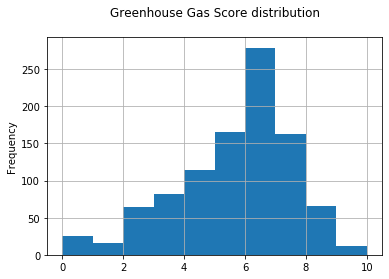

In [363]:
data_08['greenhouse_gas_score'].plot(kind = 'hist', grid = True, title = 'Greenhouse Gas Score distribution\n');

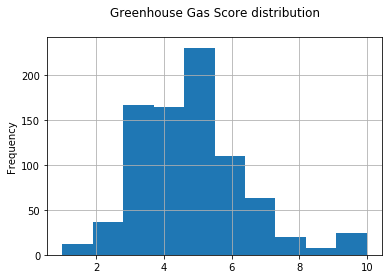

In [364]:
data_18['greenhouse_gas_score'].plot(kind = 'hist', grid = True, title = 'Greenhouse Gas Score distribution\n');

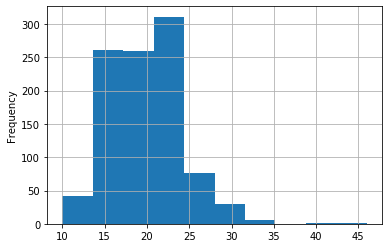

In [365]:
data_08['cmb_mpg'].plot(kind = 'hist', grid = True);

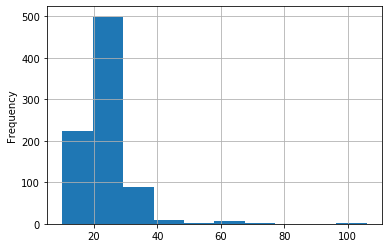

In [366]:
data_18['cmb_mpg'].plot(kind = 'hist', grid = True);

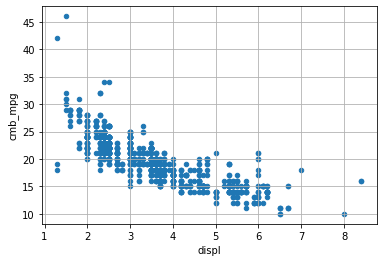

In [367]:
data_08.plot('displ', 'cmb_mpg' , kind = 'scatter', grid = True);

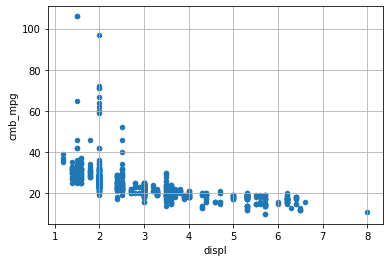

In [368]:
data_18.plot('displ', 'cmb_mpg' , kind = 'scatter', grid = True);

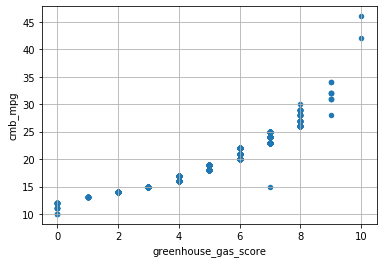

In [369]:
data_08.plot('greenhouse_gas_score', 'cmb_mpg' , kind = 'scatter', grid = True);

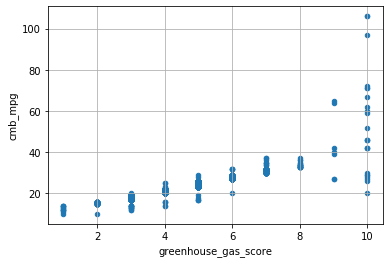

In [370]:
data_18.plot('greenhouse_gas_score', 'cmb_mpg' , kind = 'scatter', grid = True);

## Conclusions & Visuals

#### Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [371]:
data_08.model.value_counts().head(10)

NISSAN Altima           12
HONDA Accord            11
FORD Ranger             10
DODGE RAM 1500           9
SUBARU Legacy            8
DODGE Dakota             8
SUBARU Outback Wagon     7
JEEP Grand Cherokee      7
VOLVO S40                7
DODGE Nitro              7
Name: model, dtype: int64

In [372]:
data_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [373]:
data_18.model.value_counts().head(10)

FORD F150                 22
GMC Sierra 15             16
CHEVROLET Silverado 15    16
GMC Canyon                 8
CHEVROLET Colorado         8
DODGE Charger              8
GMC Yukon 1500             8
CHEVROLET Tahoe 1500       8
JEEP Cherokee              8
CHEVROLET Camaro           8
Name: model, dtype: int64

In [374]:
data_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [375]:
data_08[(data_08.fuel == 'Ethanol') | (data_08.fuel == 'CNG')].model.unique()

array(['HONDA Civic'], dtype=object)

In [376]:
len(data_08[(data_08.fuel == 'Ethanol') | (data_08.fuel == 'CNG')].model.unique())

1

In [377]:
data_18[(data_18.fuel == 'Ethanol') | (data_18.fuel == 'Electricity')].model.unique()

array(['CHEVROLET Impala', 'CHEVROLET Silverado 15',
       'CHEVROLET Suburban 1500', 'CHEVROLET Tahoe 1500', 'CHRYSLER 300',
       'DODGE Charger', 'GMC Sierra 15', 'GMC Yukon 1500',
       'GMC Yukon 1500 XL', 'GMC Yukon XL 1500', 'JEEP Cherokee',
       'MERCEDES-BENZ CLA250 4Matic', 'MERCEDES-BENZ GLA250 4Matic',
       'MERCEDES-BENZ GLE350 4Matic', 'TOYOTA Sequoia FFV',
       'TOYOTA Tundra FFV', 'BMW 330e', 'BMW 530e', 'BMW 740e',
       'CHEVROLET Volt', 'FORD Fusion Energi Plug-in Hybrid',
       'KARMA Revero', 'MINI Cooper SE Countryman All4', 'VOLVO S90',
       'VOLVO XC 60', 'VOLVO XC 90'], dtype=object)

In [378]:
len(data_18[(data_18.fuel == 'Ethanol') | (data_18.fuel == 'Electricity')].model.unique())

26

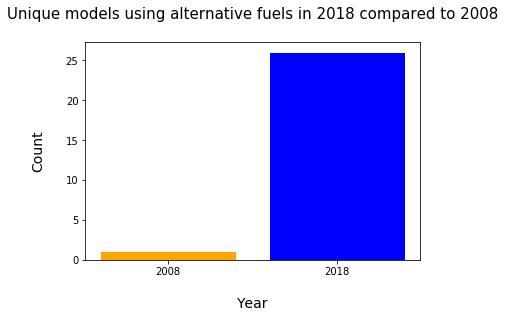

In [379]:
plt.bar(['2008', '2018'], [1, 26], color = ['orange', 'blue']);
plt.title('Unique models using alternative fuels in 2018 compared to 2008\n', fontsize = 15)
plt.xlabel('\nYear', fontsize = 14)
plt.ylabel('Count\n', fontsize = 14);

In [380]:
data_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


#### How much have vehicle classes improved in fuel economy?

In [381]:
data_08['veh_class'].unique()

array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
       'minivan', 'van', 'pickup'], dtype=object)

In [382]:
len(data_08['veh_class'].unique())

8

In [383]:
data_18['veh_class'].unique()

array(['small SUV', 'small car', 'midsize car', 'large car',
       'standard SUV', 'station wagon', 'pickup', 'special purpose',
       'minivan'], dtype=object)

In [384]:
len(data_18['veh_class'].unique())

9

In [385]:
a = data_08.groupby('veh_class')['cmb_mpg'].mean()
a

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [386]:
b = data_18.groupby('veh_class')['cmb_mpg'].mean()
b

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [387]:
c = b-a

In [388]:
c

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [389]:
c.dropna(inplace = True)

In [390]:
c

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

Text(0, 0.5, 'Increase in Average Combined MPG\n')

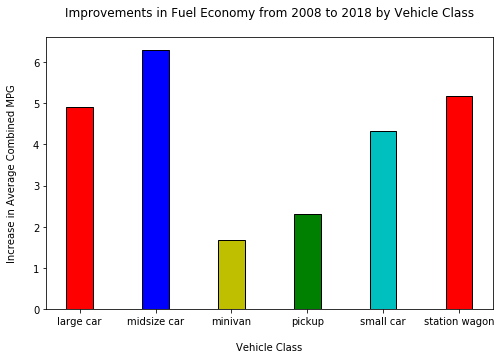

In [391]:
plt.subplots(figsize=(8, 5))
plt.bar(c.index, c, width = 0.35, color = ['r', 'b', 'y','g','c'], edgecolor='black')
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class\n')
plt.xlabel('\nVehicle Class')
plt.ylabel('Increase in Average Combined MPG\n')

In [392]:
c.index

Index(['large car', 'midsize car', 'minivan', 'pickup', 'small car',
       'station wagon'],
      dtype='object', name='veh_class')

In [393]:
c

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

#### What are the characteristics of SmartWay vehicles? Have they changed over time?

In [394]:
data_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [395]:
data_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [396]:
data_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [397]:
smart_08 = data_08.query('smartway =="yes"')

In [398]:
smart_18 = data_18.query('smartway in ["yes","Elite" ]')

In [399]:
smart_08.smartway.unique()

array(['yes'], dtype=object)

In [400]:
d = smart_08.describe()
d

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [401]:
d

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [402]:
data_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [403]:
smart_08 = data_08.query('smartway in ["yes","Elite"]')

In [404]:
e = smart_18.describe()
e

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,17.000000,17.0,17.0,17.000000,17.000000,17.000000,17.0
mean,1.970588,4.0,7.0,53.235294,53.117647,53.000000,10.0
std,0.277859,0.0,0.0,25.914594,21.854297,24.065016,0.0
min,1.500000,4.0,7.0,26.000000,28.000000,26.000000,10.0
25%,2.000000,4.0,7.0,27.000000,33.000000,29.000000,10.0
50%,2.000000,4.0,7.0,48.000000,47.000000,46.000000,10.0
75%,2.000000,4.0,7.0,66.000000,68.000000,67.000000,10.0
max,2.500000,4.0,7.0,113.000000,99.000000,106.000000,10.0


In [405]:
d-e

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,0.632307,0.826316,0.365789,-32.251084,-24.704489,-29.263158,-3.131579
std,0.345576,1.002025,1.148195,-22.471922,-18.779103,-21.004637,0.827338
min,-0.200000,0.000000,-1.000000,-9.000000,-6.000000,-6.000000,-4.000000
25%,0.275000,0.000000,0.000000,-8.000000,-7.000000,-7.000000,-4.000000
50%,0.400000,0.000000,0.000000,-28.000000,-19.000000,-23.000000,-3.000000
75%,1.000000,2.000000,0.000000,-44.000000,-38.000000,-42.000000,-3.000000
max,2.500000,4.000000,2.500000,-65.000000,-54.000000,-60.000000,0.000000


#### What features are associated with better fuel economy (mpg)?

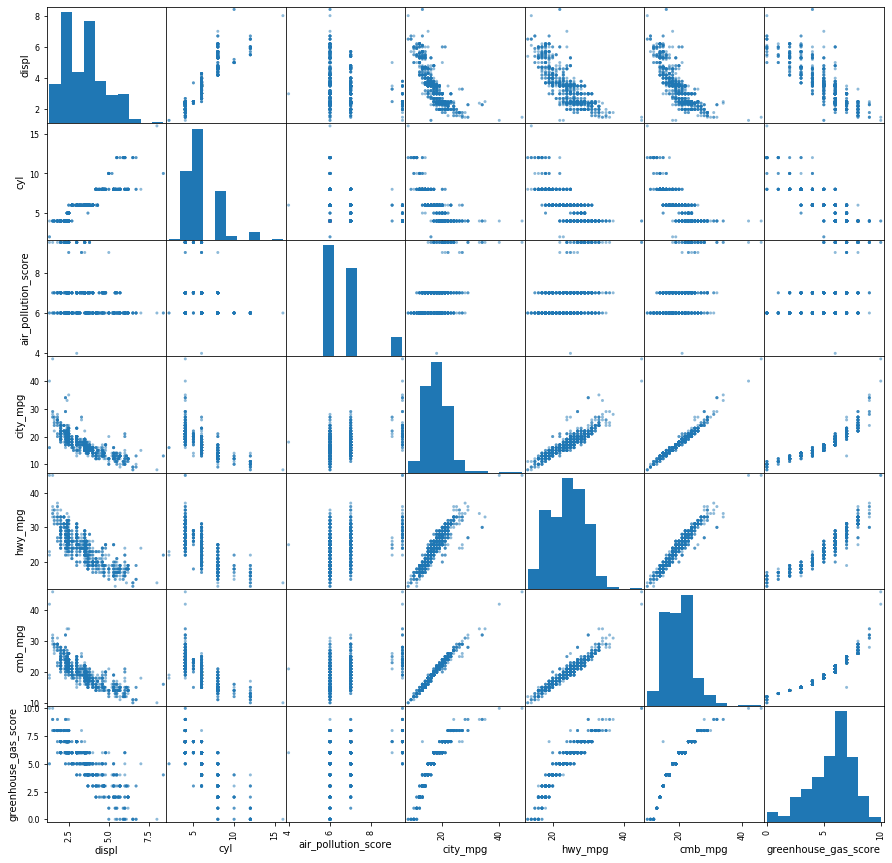

In [406]:
pd.plotting.scatter_matrix(data_08, figsize = (15,15));

In [407]:
corr_08 = data_08.corr()
corr_08

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.899304,-0.289993,-0.790440,-0.801678,-0.818799,-0.847613
cyl,0.899304,1.000000,-0.270417,-0.756304,-0.733064,-0.770538,-0.820940
air_pollution_score,-0.289993,-0.270417,1.000000,0.432434,0.400708,0.425784,0.388444
city_mpg,-0.790440,-0.756304,0.432434,1.000000,0.902942,0.980891,0.910693
hwy_mpg,-0.801678,-0.733064,0.400708,0.902942,1.000000,0.960533,0.931744
cmb_mpg,-0.818799,-0.770538,0.425784,0.980891,0.960533,1.000000,0.947607
greenhouse_gas_score,-0.847613,-0.820940,0.388444,0.910693,0.931744,0.947607,1.000000


In [408]:
corr_18 = data_18.corr()
corr_18

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.928189,-0.384986,-0.536748,-0.605202,-0.574880,-0.754193
cyl,0.928189,1.000000,-0.404966,-0.524090,-0.589986,-0.561166,-0.743946
air_pollution_score,-0.384986,-0.404966,1.000000,0.288700,0.309338,0.301150,0.390771
city_mpg,-0.536748,-0.524090,0.288700,1.000000,0.950309,0.992635,0.785513
hwy_mpg,-0.605202,-0.589986,0.309338,0.950309,1.000000,0.978206,0.826981
cmb_mpg,-0.574880,-0.561166,0.301150,0.992635,0.978206,1.000000,0.814982
greenhouse_gas_score,-0.754193,-0.743946,0.390771,0.785513,0.826981,0.814982,1.000000


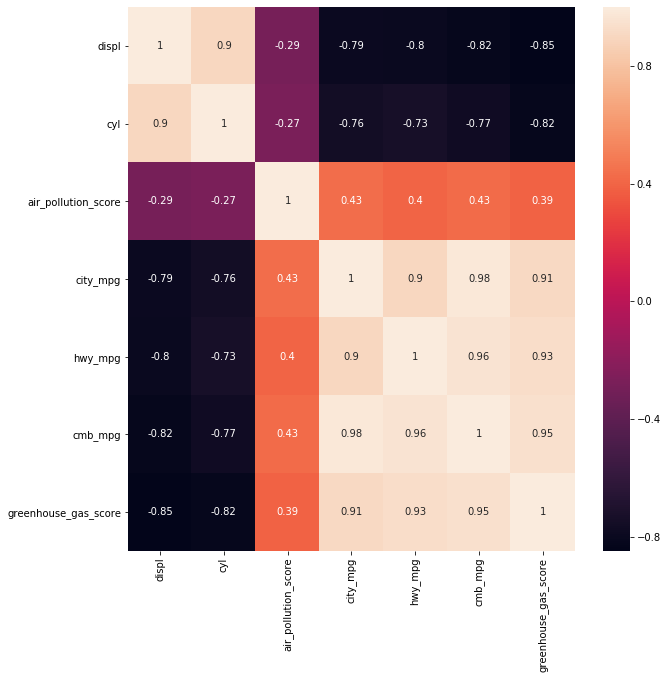

In [409]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_08, annot=True);


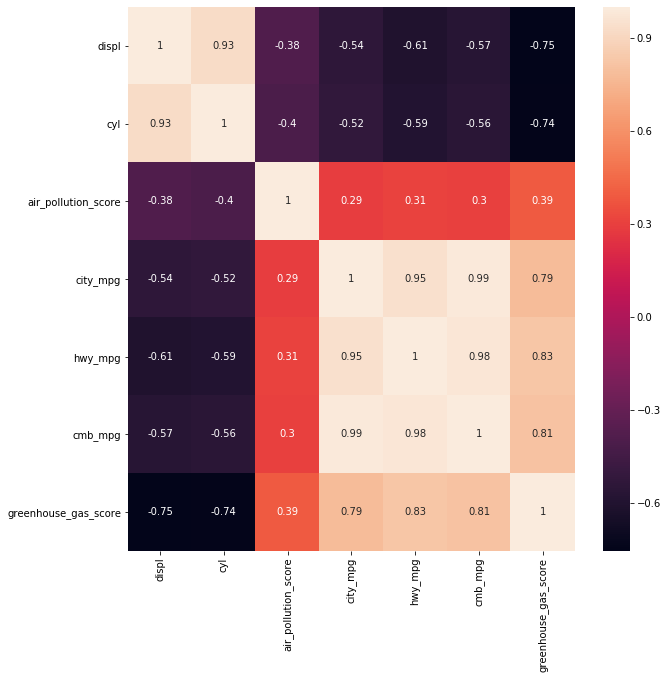

In [410]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_18, annot=True);

In [411]:
numerical_features_data_08 = data_08.select_dtypes(include=[np.number])
numerical_features_data_18 = data_18.select_dtypes(include=[np.object])

In [412]:
numerical_features_data_08.columns

Index(['displ', 'cyl', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score'],
      dtype='object')

In [413]:
numerical_features_data_18.columns

Index(['model', 'trans', 'drive', 'fuel', 'veh_class', 'smartway'], dtype='object')

In [414]:
data_08[['displ', 'cyl', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score']].corr()['cmb_mpg'][:]

displ                  -0.818799
cyl                    -0.770538
air_pollution_score     0.425784
city_mpg                0.980891
hwy_mpg                 0.960533
cmb_mpg                 1.000000
greenhouse_gas_score    0.947607
Name: cmb_mpg, dtype: float64

In [415]:
corr_08.nlargest(8, 'cmb_mpg')['cmb_mpg']

cmb_mpg                 1.000000
city_mpg                0.980891
hwy_mpg                 0.960533
greenhouse_gas_score    0.947607
air_pollution_score     0.425784
cyl                    -0.770538
displ                  -0.818799
Name: cmb_mpg, dtype: float64

#### For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [416]:

data_08.rename(columns = lambda x: x[:10] + "_2008", inplace=True)

data_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [417]:
inner_join = pd.merge(left = data_08, right = data_18, left_on='model_2008', right_on='model')

In [418]:
inner_join.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [419]:
inner_join.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'veh_class_2008', 'air_pollut_2008', 'city_mpg_2008',
       'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008', 'smartway_2008',
       'model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [420]:
inner_join.shape

(922, 26)

In [421]:
inner_join.iloc[:,np.r_[0, 13]].head(10)

,model_2008,model
0,ACURA RDX,ACURA RDX
1,ACURA RDX,ACURA RDX
2,AUDI A3,AUDI A3
3,AUDI A3,AUDI A3
4,AUDI A3,AUDI A3
5,AUDI A3,AUDI A3
6,AUDI A3,AUDI A3
7,AUDI A3,AUDI A3
8,AUDI A4,AUDI A4
9,AUDI A4,AUDI A4


In [422]:
model_mpg = inner_join.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [423]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [424]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg']-model_mpg['cmb_mpg_2008']

In [427]:
maximum_mpg_change_model = model_mpg.loc[model_mpg['mpg_change'] == max(model_mpg['mpg_change'])]

In [428]:
maximum_mpg_change_model

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


In [430]:
for i, v in enumerate(inner_join):
    print(i, v)

0 model_2008
1 displ_2008
2 cyl_2008
3 trans_2008
4 drive_2008
5 fuel_2008
6 veh_class_2008
7 air_pollut_2008
8 city_mpg_2008
9 hwy_mpg_2008
10 cmb_mpg_2008
11 greenhouse_2008
12 smartway_2008
13 model
14 displ
15 cyl
16 trans
17 drive
18 fuel
19 veh_class
20 air_pollution_score
21 city_mpg
22 hwy_mpg
23 cmb_mpg
24 greenhouse_gas_score
25 smartway


In [431]:
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(inner_join)
profile_report